# 1. Fundamental Theorem of Calculus
All across the field of Machine Learning calculus is utilized. In the world of Deep Learning, optimization via the backpropagation reigns supreme, and it is often easy to end up either letting the computer handle all of the derivation and integration for you, or to forget the underlying intuition of what the equations mean in english. 

<br>
This notebook was designed with the idea of being a fun review that will create a deeper understanding of a fundamental theorem that is seen in nearly every corner of Machine Learning. We will be exploring the relationship between **distance** and **velocity** since they are easily understood based on every day experiences. 

<br>
Before we begin, however, I want you to try and do the following two things:
> 1. Explain in english, what a derivative is.
2. Then explain what an integral is...and what does it have to do with area...?

Take 5 minutes to try this! The reason it is a valuable exercise is because often times when learning math you may either never fully understand the intuition and resort to rote memorization, or over the years it has been lost as software has been able to implement the mechanical calculations for you. If this was the case for you then I think you will find this walkthrough very enjoyable, and you may come away with a greater appreciation for just how beautiful calculus is! 

---

## 1.1 Distance 
To begin let's just think about the concept of **distance**. The units (meters, miles, kilometers, inches, etc) do not particularly matter and in reality can just get in the way, so we will leave them unitless for now. For now we can just think about distance as how far you travel as a function of **time**. We will define our distance function for this walkthrough to be: 

#### $$Distance = s(t) = 4x^2 - \frac{1}{3}x^3$$ 

Note that the reason I am using the variable $s$ to represent the distance function is to prevent confusion with derivative notation that will be introduced shortly. With that said, let's get a visualization of this function.

In [17]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import seaborn as sns

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

from IPython.display import HTML
%matplotlib notebook

""" ------- Initial Constants -------"""
lower_initial = 0
upper_initial = 8
length = 2000

In [18]:
""" ------ Distance Function ------ """
def distance(x):
  return 4 * np.power(x, 2) - (1 / 3) * np.power(x, 3)

<IPython.core.display.Javascript object>


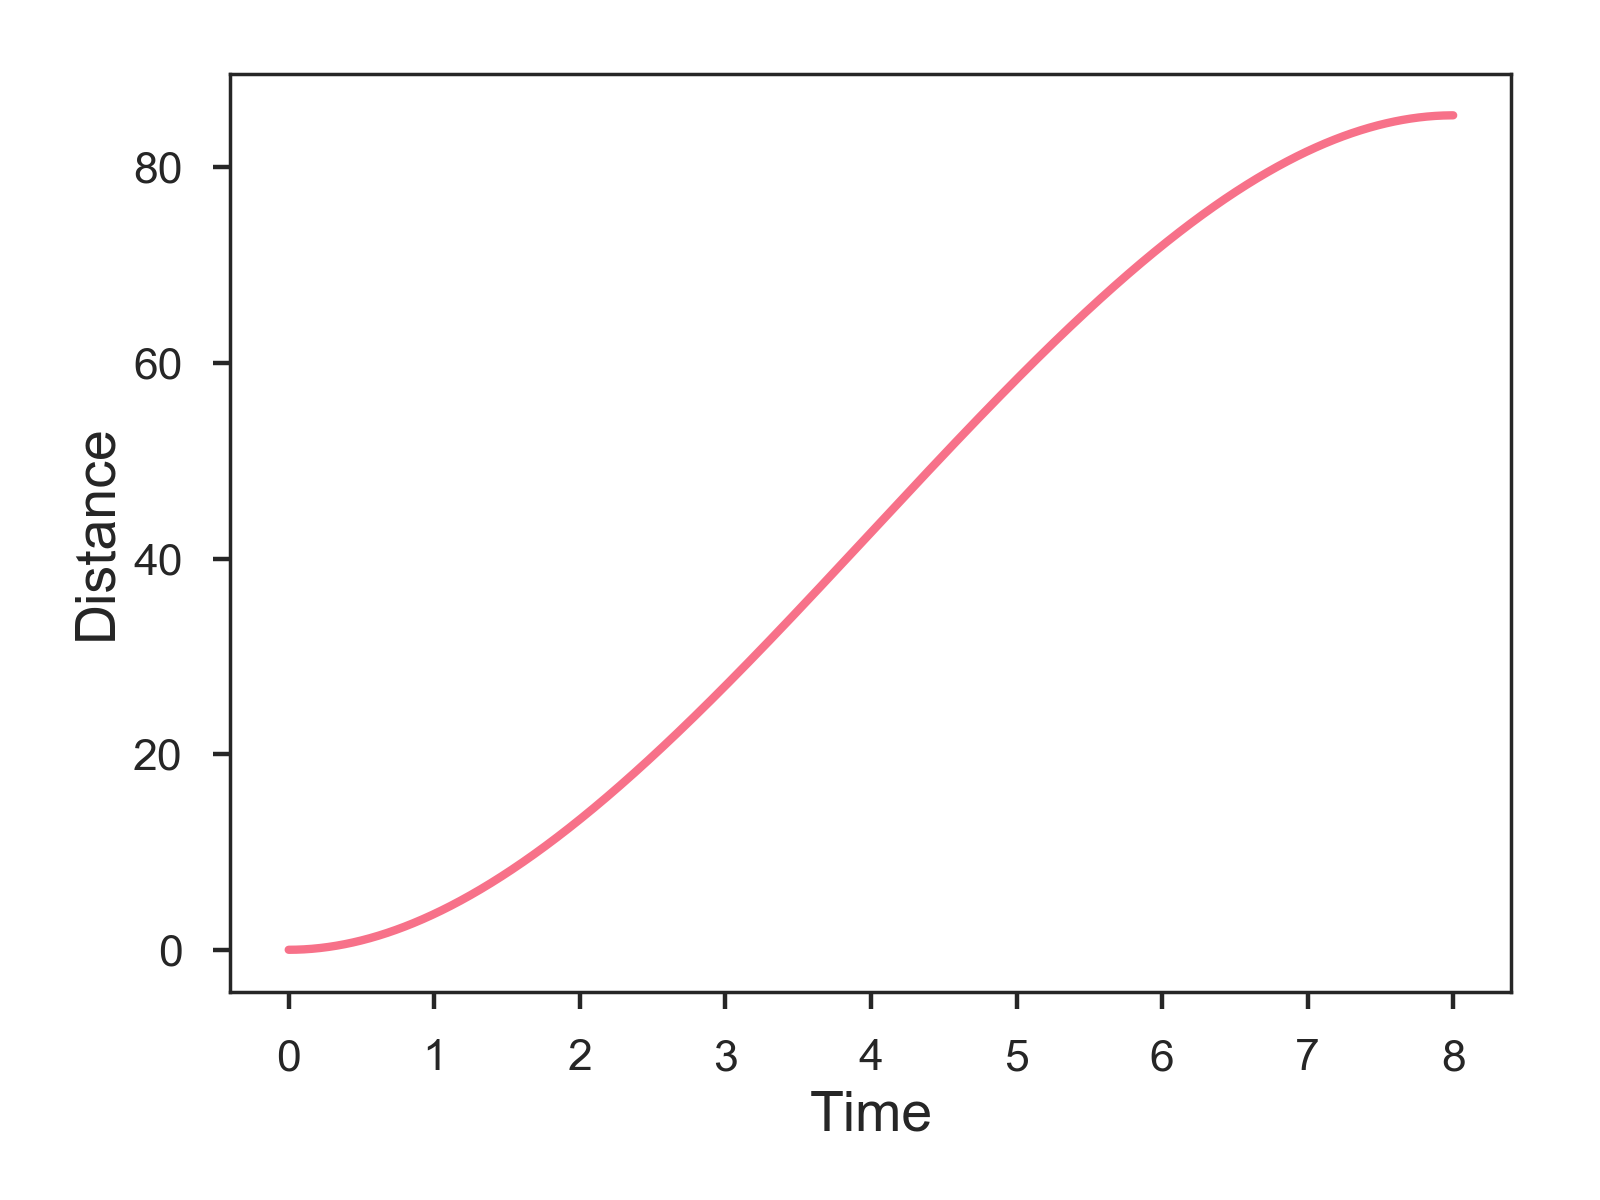

In [19]:
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = distance(x)
ax1.plot(x, y, lw=3)

plt.show()

Awesome. So we can see that the curve representing $s(t)$ is steepest when time is equal to 4, and at the ends (0 and 8) it becomes flat. Of course the steepness that we are talking about is known as **slope**, or **rate of change**. When time is equal to 4 the rate of change is high, meanwhile when time is equal to 0 or 8 the rate of change is low. 

Now before we bring in the concept of a derivative, let's look at an animation of this curve being created. What we want to focus on is what happens to our **distance** at time $t$ when we give a slight nudge to $t$. We can call this slight change, $dt$.

In [20]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1) = plt.subplots(1, figsize=(6, 4))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  
def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  return d

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)
# ani = FuncAnimation(fig, animate_distance, steps, 
#                     init_func=init_distance, interval=100, blit=True)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

Now, watch as as the $s(t)$ curve is drawn and play close attention specifically to how $s(t)$ responds to changes in $t$ over intervals of 2 seconds. To make this more concrete, take the slider that controls the animation and move it from 0 to 2 seconds manually. How much of a chance in distance is there during that 2 second interval? Well we go from a distance of 0 to a distance of ~16. (Note that I have not calculated the specific change in distance here purposefully; I am simply using the plot in order to keep this understanding visual and intuitive). 

If we then look at the next interval, from $t = 2$ to $t =4$, we can see that our increase is from $s(t = 2) = 16$ to $s(t =4) = 42$. So, in this 2 second interval, we $s(t)$ increased by approximately 25. What we have seen first hand is that during different intervals of $t$, our distance will change more quickly. From $t=0$  to $t=2$ we increased by 16, but from $t=2$ to $t=4$ we increased by 25. Both intervals were the same, but the amount the distance increased was larger in the second interval. 

That is the meaning of **slope** and rate of change. Over a specific input interval, how much does our the response change? 

## 1.1.1 The Derivative of Distance 


---

# Velocity 

<IPython.core.display.Javascript object>


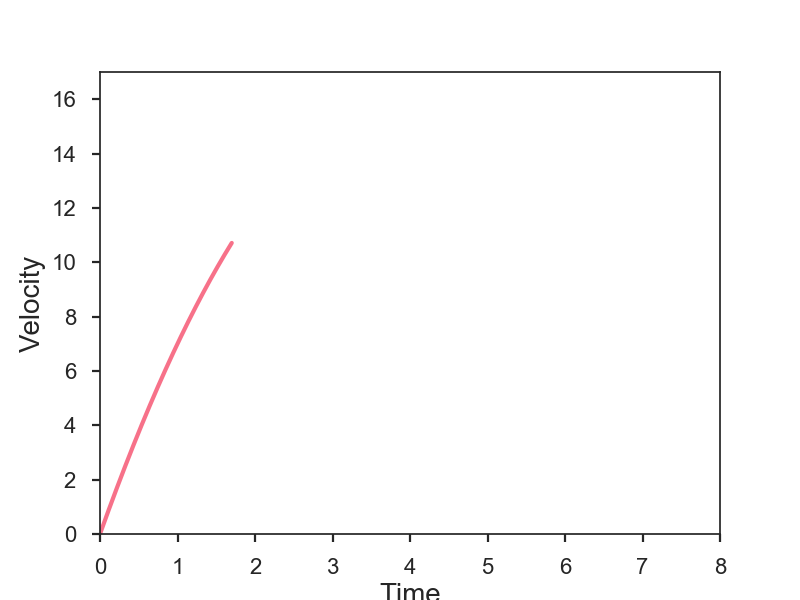

In [8]:
def velocity(x):
  return x * (8 - x)

fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object  
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity

def animate_velocity(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
def init_velocity():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  return v

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_velocity, steps, 
                    init_func=init_velocity, interval=100, blit=True)
plt.show()

In [11]:
# HTML(ani.to_html5_video())
# import matplotlib.animation as animation
# print(animation.writers.list())

---

# Distance

<IPython.core.display.Javascript object>


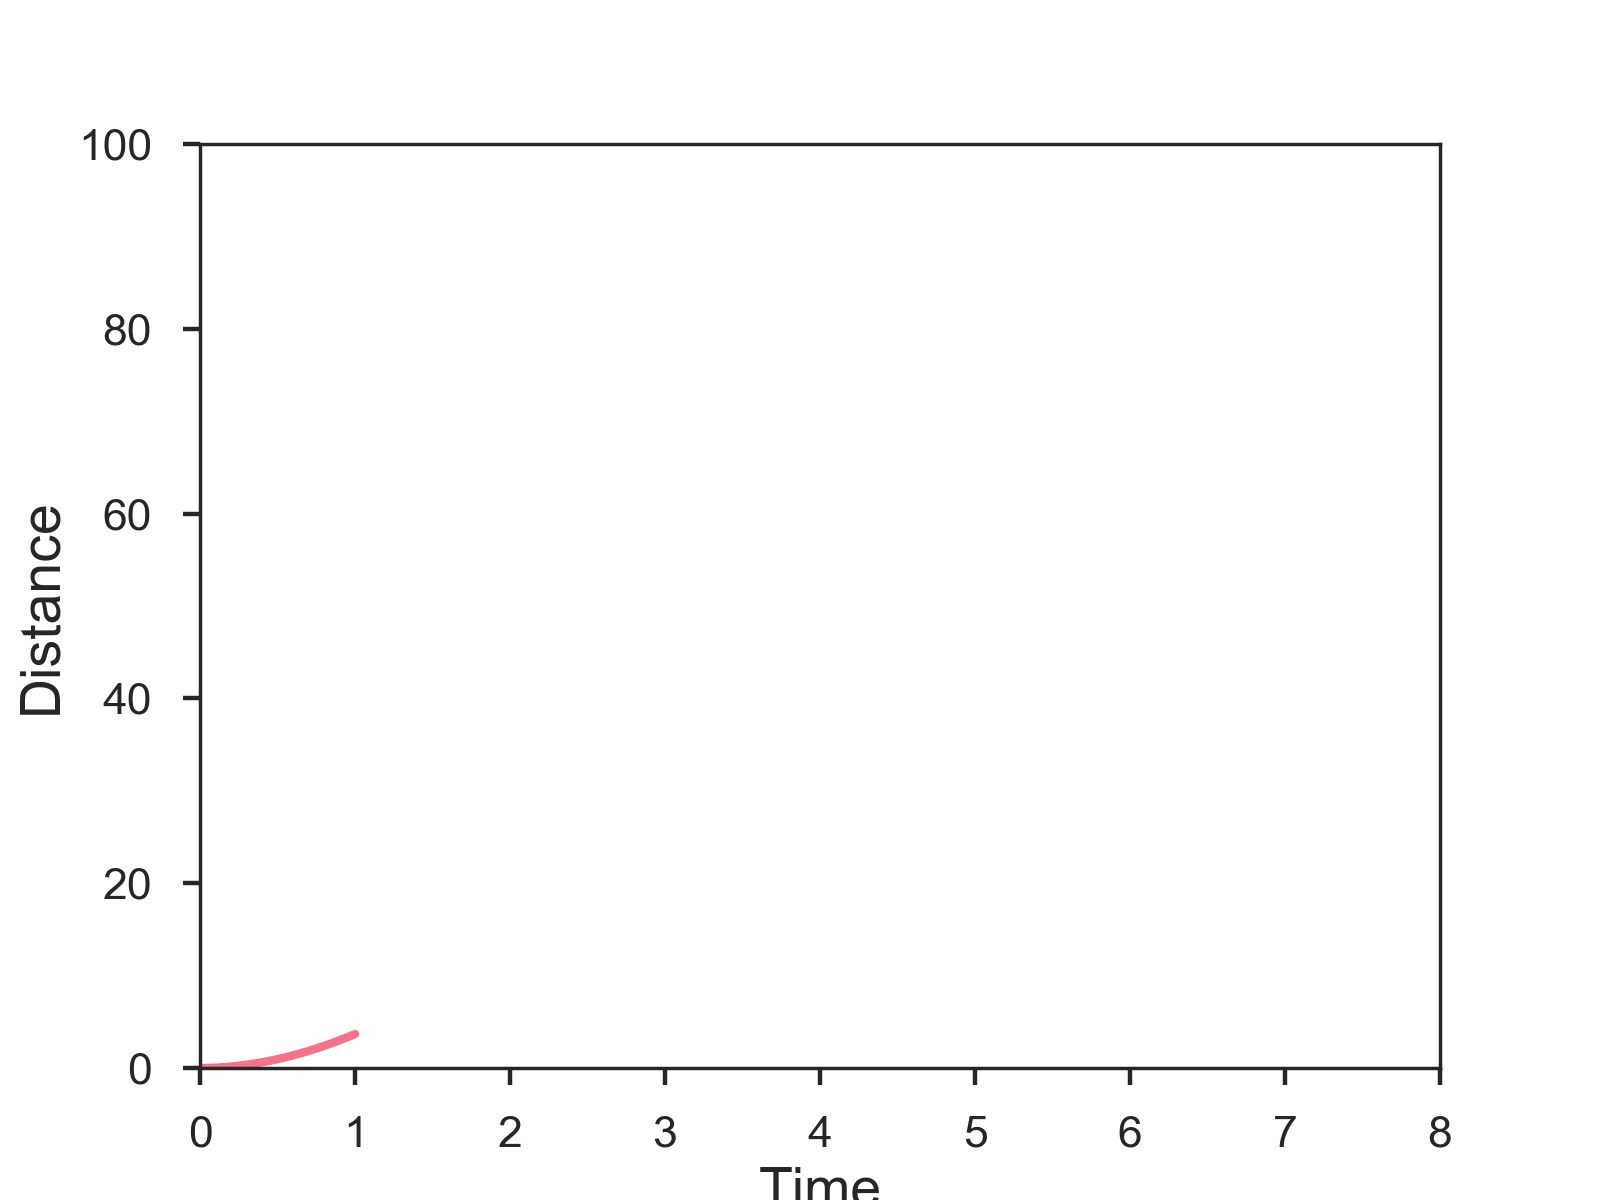

In [9]:
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  
def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  return d

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_distance, steps, 
                    init_func=init_distance, interval=100, blit=True)
plt.show()

---

# Velocity and Distance

<IPython.core.display.Javascript object>


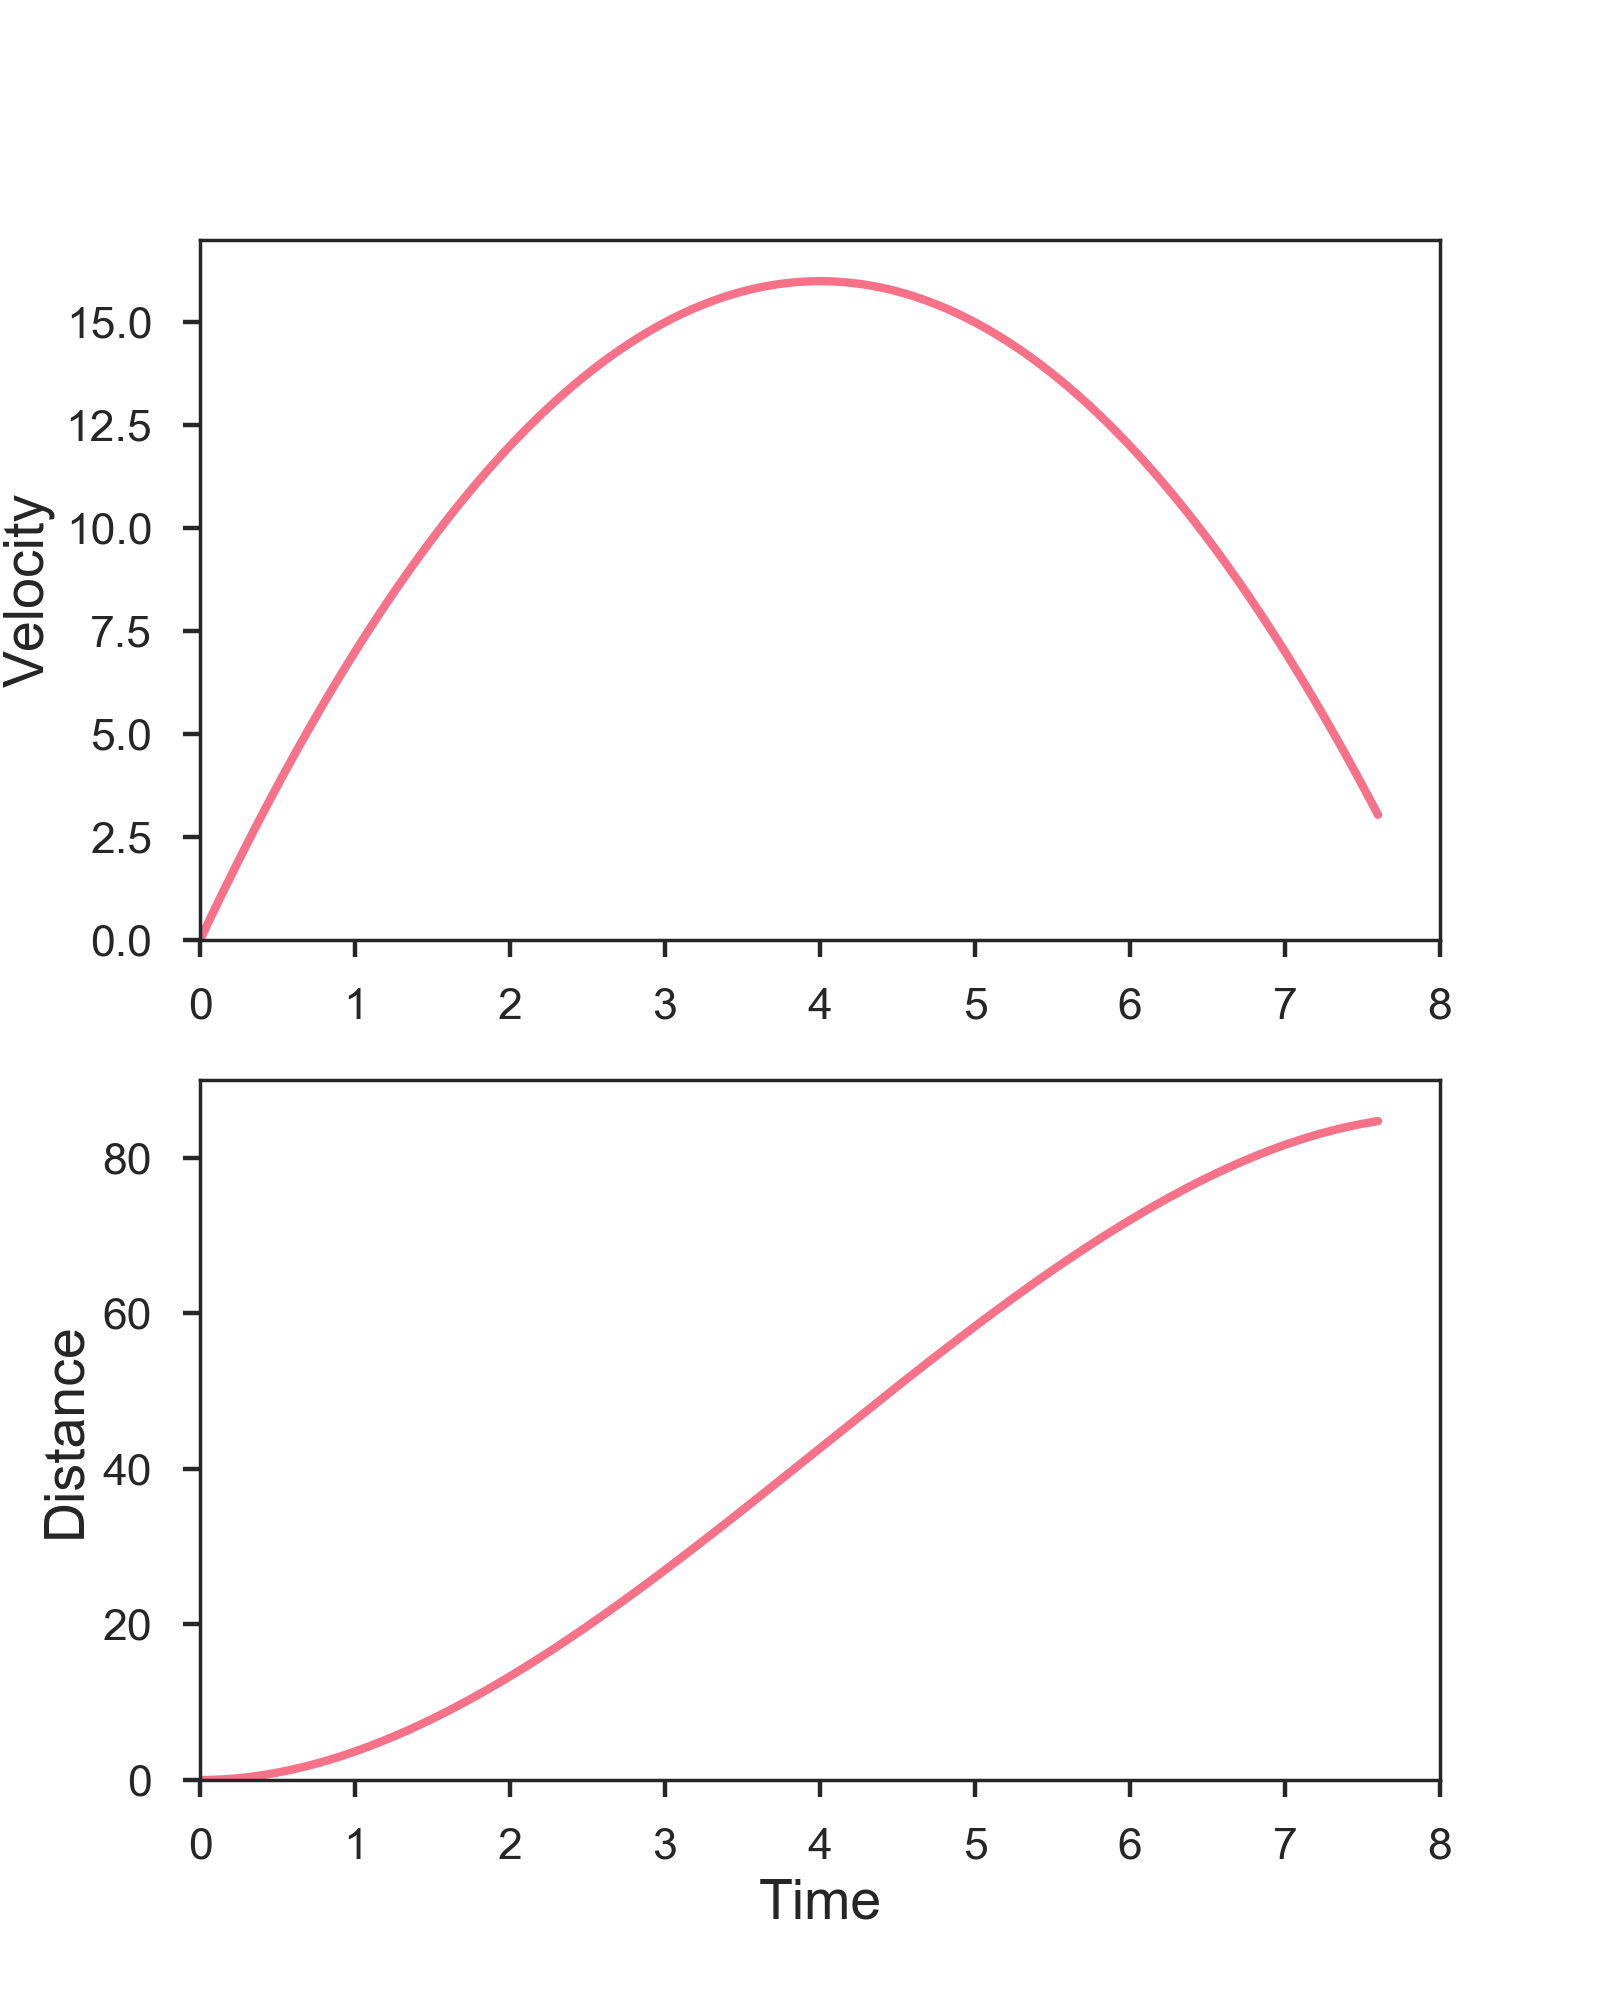

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))            # Create figure and axis object  
# ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity
d, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_v_d(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
  dist = distance(x)
  d.set_data(x, dist)          
  
def init_v_d():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 90) 
  
  return v, d

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_v_d, steps, 
                    init_func=init_v_d, interval=100, blit=True)
plt.show()

---

# Velocity and Distance...or should we say area under velocity curve

<IPython.core.display.Javascript object>


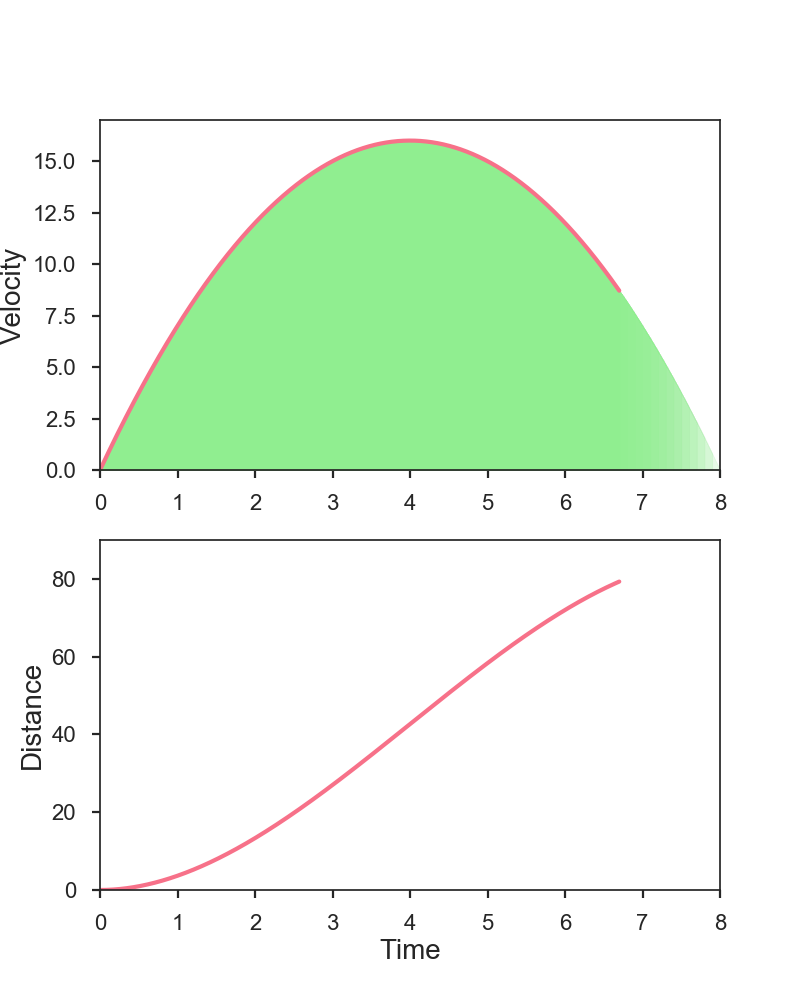

In [65]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))            # Create figure and axis object  
# ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity
d, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_v_d(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
  collection = ax1.fill_between(x, vel, color='lightgreen', alpha='0.1')
  path = collection.get_paths()[0]
  path.vertices[:, 1] 
  
  dist = distance(x)
  d.set_data(x, dist)    

def init_v_d():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 90) 
  
  return v, d

""" Define steps and create animation object """
# step = 0.05      -> use for smoother animation
step = 0.1
steps = np.arange(0, 8.1, step)
# ani = FuncAnimation(fig, animate_v_d, steps, 
#                     init_func=init_v_d, interval=50, blit=True)
html_video = HTML(FuncAnimation(fig, animate_v_d, steps, init_func=init_v_d, interval=50, blit=True)
.to_html5_video())

So the main thing to note is look at how the area is changing under the velocity curve...it is changing maximally at time t = 4, which is when the distance has the highest slope. The rate at which the area under the velocity curve changes is equal to the rate at which distance changes given a certain x!!!!! What is CRAZY is that the rate at which the area under the velocity curve changes at a given x is just the value of the velocity curve at that x. THIS IS BECAUSE VELOCITY IS THE DERIVATIVE OF DISTANCE. So, in other words, the area under the velocity curve is distance, and if we want to see how the area (distance) is changing we can just look at the value of velocity at that location. Based on this relationship, we can determine the formula for distance based on whatever equation, when its derivative was taken, would have yielded the velocity equation. 

http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [66]:
html_video

In [57]:
test = np.array([1,2,3,4,5,6,7,8,9,10])
c = 1

In [58]:
test[c-5:c]

array([], dtype=int64)